**Import Libraries**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
np.random.seed(42)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    learning_curve,
    train_test_split,
    cross_val_predict
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    classification_report,
     confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline 
from imblearn.over_sampling import RandomOverSampler

from sklearn.neural_network import MLPClassifier 
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from pytorch_tabnet.callbacks import EarlyStopping
import numpy as np
import torch




**Load the data**

In [8]:


df = pd.read_csv('../data/Molecules_data.csv')
df = df.drop(df.columns[0], axis=1) # drop first column (identifier)
df.head()
df.info()
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.5+ MB


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,-0.032016,0.327044,-0.000701,-0.061154,1.018868,0.704031,-0.023251,-0.049010,1.609214,0.002133,...,23.222747,8.09434,13.417422,0.203552,1.229619,0.011494,1.471698,0.005184,-0.085793,0.060818
std,0.063713,0.775388,0.062758,0.072679,1.122112,1.678990,0.077983,0.101976,2.513948,0.074040,...,6.581596,4.42080,6.321318,0.024548,0.137841,0.005521,1.011399,0.046112,0.029645,0.247864
min,-0.311500,0.000000,-0.184600,-0.348500,0.000000,0.000000,-0.211900,-0.338700,-0.708700,-0.198700,...,0.000000,0.00000,0.000000,0.163600,0.811500,0.001400,0.000000,0.000000,-0.202700,0.000000
25%,-0.068500,0.000000,-0.035300,-0.099550,0.000000,0.000000,-0.066300,-0.115350,0.000000,-0.052350,...,19.045300,5.16470,8.020450,0.183800,1.142150,0.007750,1.000000,0.000000,-0.099700,0.000000
50%,-0.033400,0.000000,-0.002200,-0.060300,1.000000,0.000000,-0.037200,-0.042300,0.000000,-0.001800,...,23.180800,7.82760,13.342700,0.201900,1.234000,0.010700,1.000000,0.000000,-0.082500,0.000000
75%,0.005550,0.000000,0.027950,-0.016300,2.000000,0.000000,0.002650,0.014950,4.911250,0.056550,...,26.974500,10.54115,19.319450,0.220550,1.324150,0.014150,2.000000,0.000000,-0.066900,0.000000
max,0.108800,4.000000,0.218100,0.129000,6.000000,8.141400,0.249500,0.201000,7.740800,0.166300,...,41.380000,20.80540,27.879600,0.272100,1.548800,0.034600,5.000000,0.429200,-0.007300,2.636100


**Data Cleaning**

**Check missing values**

In [9]:
print(df.isnull().sum())#no missing values

MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64


**Encode categorical variables**

In [10]:
# class is the only categorical variable =>encode
df['Class'] = df['Class'].map({'NonToxic': 0, 'Toxic': 1})

**spearate features and class column**

In [11]:
X=df.drop('Class',axis=1)
Y=df['Class']


**check for imbalance**

In [12]:
df['Class'].value_counts()# there is imbalance

Class
0    108
1     51
Name: count, dtype: int64

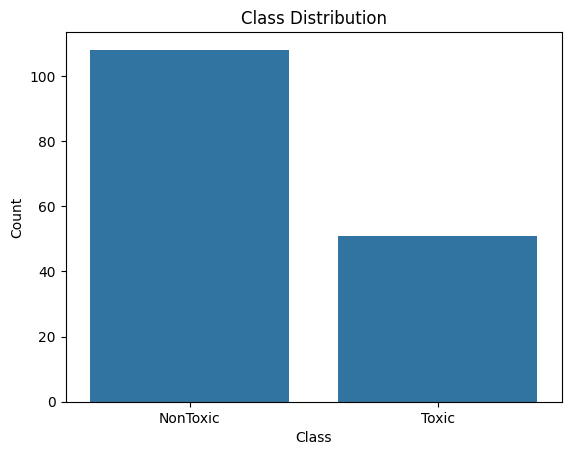

In [13]:
sns.countplot(x='Class', data=df)
plt.xticks([0, 1], ['NonToxic', 'Toxic'])  # replace 0/1 with labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



**Handle Imabalance**
**Since data is small and numeric we will experiment with random oversampling and smote**

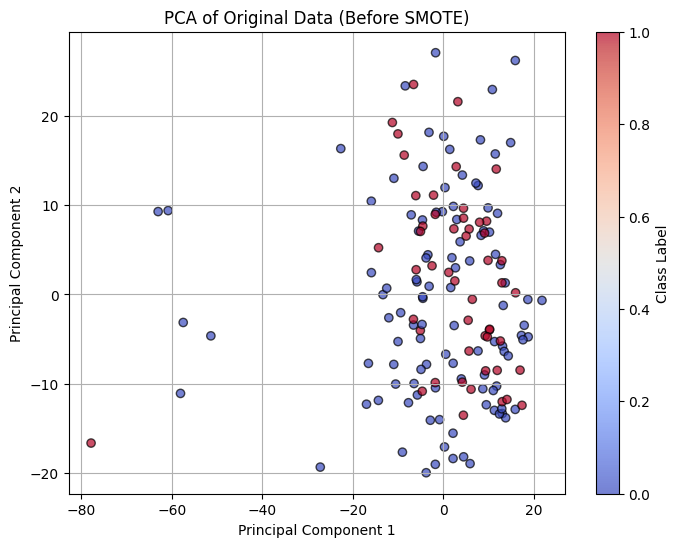

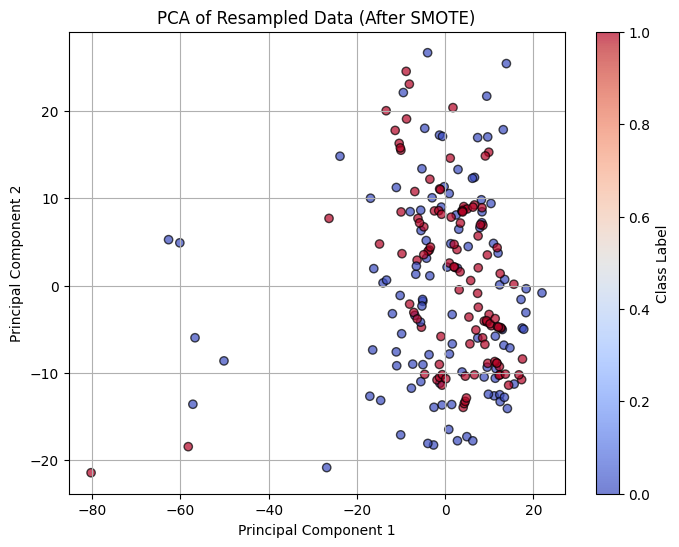

In [14]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA before SMOTE (just for visualization)
pca_original = PCA(n_components=2)
X_pca_original = pca_original.fit_transform(X_scaled)

#  Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_original[:, 0], X_pca_original[:, 1], c=Y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("PCA of Original Data (Before SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, Y)

#  Apply PCA after SMOTE
pca_resampled = PCA(n_components=2)
X_pca_resampled = pca_resampled.fit_transform(X_resampled)

# Plot resampled data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_resampled[:, 0], X_pca_resampled[:, 1], c=y_resampled, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("PCA of Resampled Data (After SMOTE)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()


The results of PCA suggest that applying the SMOTE technique may not be beneficial for this dataset.In PCA  visualization  the synthetic  minority samples appear tightly clustered in some regions overlaping with majority class which can potentially blur the class boundaries and reduce the effectiveness of the classifier.

**Feature Selection using Random forest and  Split the data training and testing**

In [15]:
X_new = SelectKBest(f_classif, k=5).fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, Y, test_size=0.2, stratify=Y, random_state=42
)


**Logistic Regression with random oversampling**

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- METRICS ---
Best Parameters: {'clf__penalty': 'l2', 'clf__C': 0.001}

Train Accuracy: 0.598
Validation Accuracy: 0.591
Test Accuracy: 0.719

Train F1 Score: 0.505
Validation F1 Score: 0.509
Test F1 Score: 0.690

Train ROC AUC: 0.615
Validation ROC AUC: 0.585
Test ROC AUC: 0.791
Test Precision-Recall AUC: 0.543

Classification Report (Test):

              precision    recall  f1-score   support

    NonToxic       1.00      0.59      0.74        22
       Toxic       0.53      1.00      0.69        10

    accuracy                           0.72        32
   macro avg       0.76      0.80      0.72        32
weighted avg       0.85      0.72      0.73        32



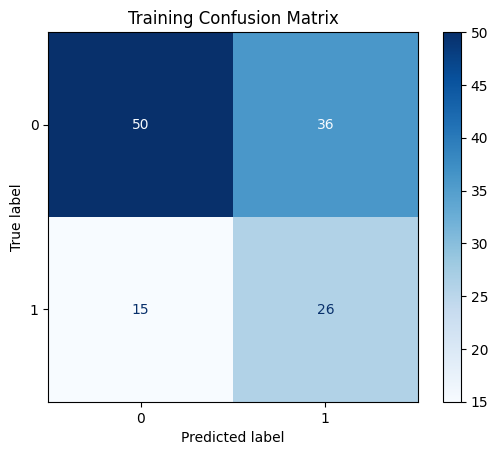

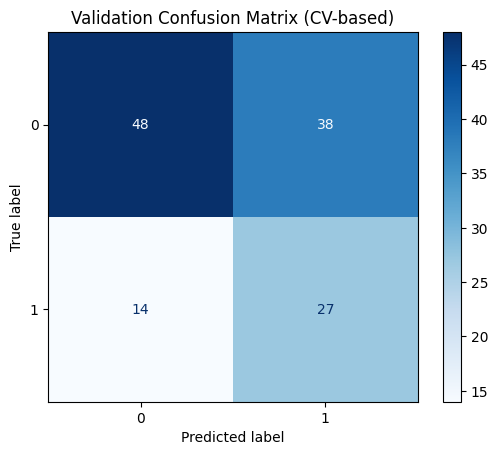

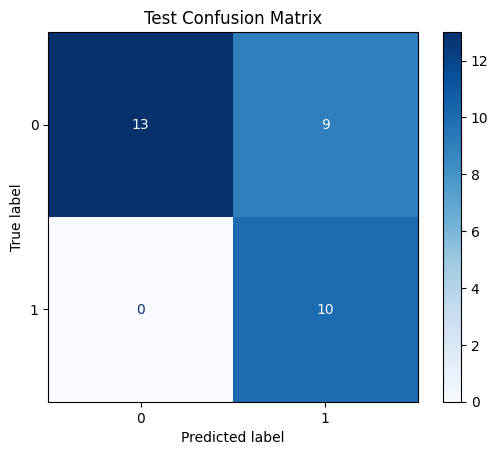

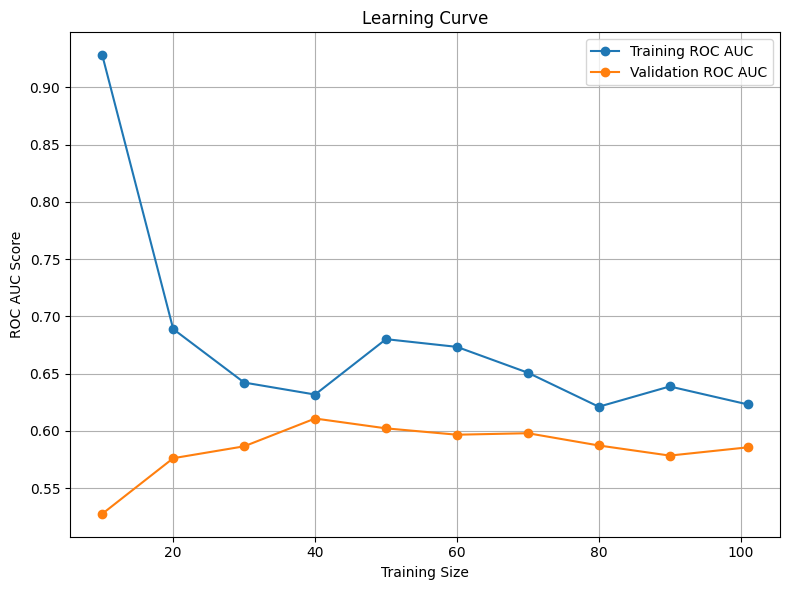

In [16]:

pipeline = ImbPipeline([
    ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', max_iter=5000, random_state=42))
])


param_grid = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring='f1',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


search.fit(X_train, y_train)


y_pred_train = search.best_estimator_.predict(X_train)
y_proba_train = search.best_estimator_.predict_proba(X_train)[:, 1]

# Test
y_pred_test = search.best_estimator_.predict(X_test)
y_proba_test = search.best_estimator_.predict_proba(X_test)[:, 1]


y_pred_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict'
)
y_proba_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict_proba'
)[:, 1]


print("\n--- METRICS ---")
print("Best Parameters:", search.best_params_)

print(f"\nTrain Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_pred_val):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

print(f"\nTrain F1 Score: {f1_score(y_train, y_pred_train):.3f}")
print(f"Validation F1 Score: {f1_score(y_train, y_pred_val):.3f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_test):.3f}")

print(f"\nTrain ROC AUC: {roc_auc_score(y_train, y_proba_train):.3f}")
print(f"Validation ROC AUC: {roc_auc_score(y_train, y_proba_val):.3f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba_test):.3f}")
print(f"Test Precision-Recall AUC: {average_precision_score(y_test, y_proba_test):.3f}")

print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test, target_names=["NonToxic", "Toxic"]))


def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

plot_conf_matrix(y_train, y_pred_train, "Training Confusion Matrix")
plot_conf_matrix(y_train, y_pred_val, "Validation Confusion Matrix (CV-based)")
plot_conf_matrix(y_test, y_pred_test, "Test Confusion Matrix")


def plot_learning_curve(estimator, X, y, scoring='roc_auc', cv=None, title='Learning Curve'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Training ROC AUC')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation ROC AUC')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('ROC AUC Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot learning curve
plot_learning_curve(search.best_estimator_, X_train, y_train, scoring='roc_auc', cv=cv)


**XGBoost**

Fitting 8 folds for each of 150 candidates, totalling 1200 fits
Best Params: {'clf__subsample': 0.8, 'clf__scale_pos_weight': 2, 'clf__reg_lambda': 1, 'clf__reg_alpha': 5, 'clf__n_estimators': 300, 'clf__min_child_weight': 5, 'clf__max_depth': 3, 'clf__learning_rate': 0.07, 'clf__gamma': 0.1, 'clf__colsample_bytree': 0.6}
Best CV F1 Score: 0.48959153591506527

Train Accuracy: 0.598
Validation Accuracy: 0.528
Test Accuracy: 0.594

Train F1 Score: 0.605
Validation F1 Score: 0.492
Test F1 Score: 0.606

Train ROC AUC: 0.832
Validation ROC AUC: 0.503
Test ROC AUC: 0.755

Test PR AUC: 0.495

Classification Report (Test):
              precision    recall  f1-score   support

    NonToxic       1.00      0.41      0.58        22
       Toxic       0.43      1.00      0.61        10

    accuracy                           0.59        32
   macro avg       0.72      0.70      0.59        32
weighted avg       0.82      0.59      0.59        32



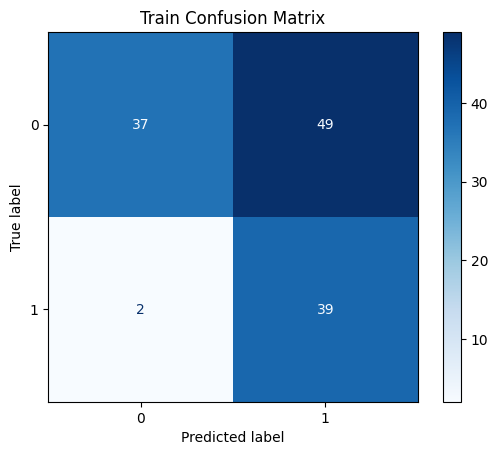

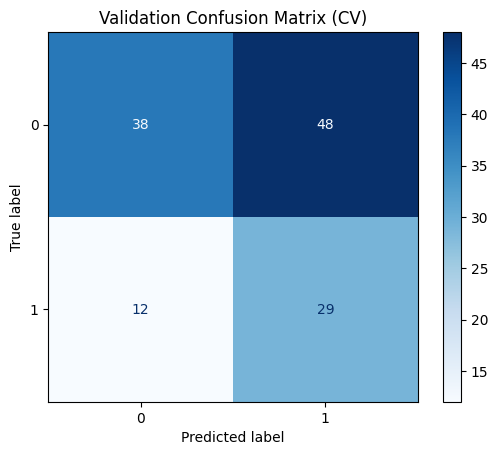

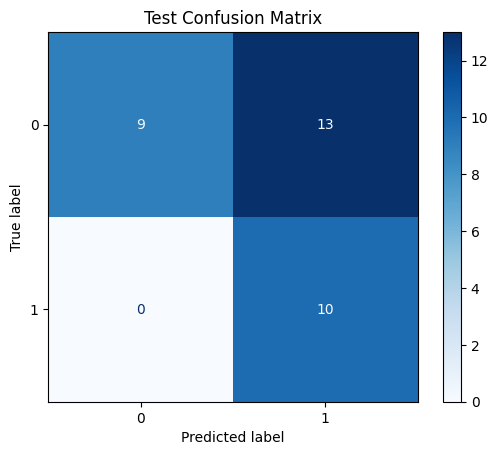

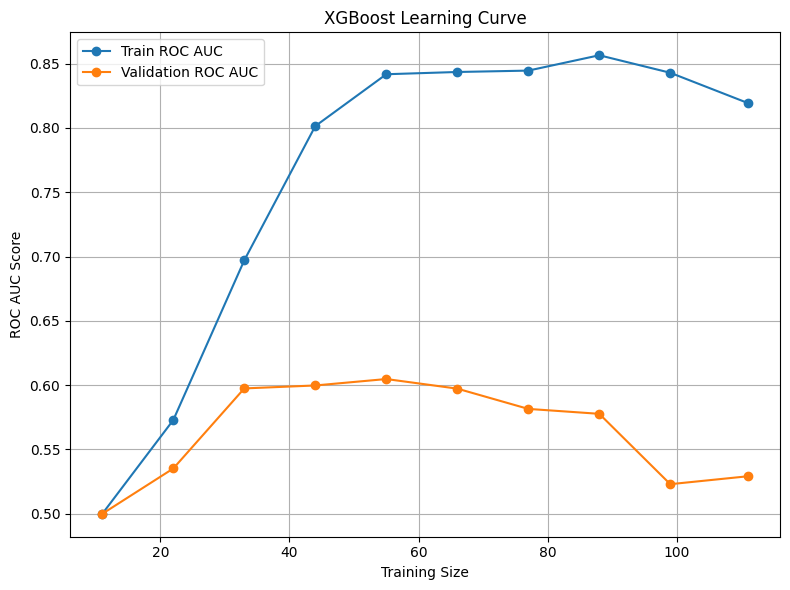

In [17]:
# XGBoost pipeline
pipeline = ImbPipeline([
      ('sampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(eval_metric='logloss',random_state=42))

])

# Parameter grid
param_grid = {

    'clf__n_estimators': [200, 300],
    'clf__max_depth': [3, 4, 5],
    'clf__min_child_weight': [1, 3, 5],
    'clf__gamma': [0, 0.1],
    'clf__learning_rate': [0.07, 0.1],
    'clf__subsample': [0.8],
    'clf__colsample_bytree': [0.6, 0.8],
    'clf__scale_pos_weight': [1, 1.5, 2],
    'clf__reg_alpha': [0, 0.1, 1, 5],
    'clf__reg_lambda': [1, 2, 5]



}
# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

# Randomized Search
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=150,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
search.fit(X_train, y_train)

# Predictions
y_pred_train = search.best_estimator_.predict(X_train)
y_pred_test = search.best_estimator_.predict(X_test)
y_proba_train = search.best_estimator_.predict_proba(X_train)[:, 1]
y_proba_test = search.best_estimator_.predict_proba(X_test)[:, 1]

# Validation predictions
y_pred_val = cross_val_predict(search.best_estimator_, X_train, y_train, cv=cv, method='predict')
y_proba_val = cross_val_predict(search.best_estimator_, X_train, y_train, cv=cv, method='predict_proba')[:, 1]


# Metrics

print("Best Params:", search.best_params_)
print("Best CV F1 Score:", search.best_score_)

print(f"\nTrain Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_pred_val):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

print(f"\nTrain F1 Score: {f1_score(y_train, y_pred_train):.3f}")
print(f"Validation F1 Score: {f1_score(y_train, y_pred_val):.3f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_test):.3f}")

print(f"\nTrain ROC AUC: {roc_auc_score(y_train, y_proba_train):.3f}")
print(f"Validation ROC AUC: {roc_auc_score(y_train, y_proba_val):.3f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_proba_test):.3f}")

print(f"\nTest PR AUC: {average_precision_score(y_test, y_proba_test):.3f}")

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, target_names=["NonToxic", "Toxic"]))


# Confusion Matrices

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

plot_conf_matrix(y_train, y_pred_train, "Train Confusion Matrix")
plot_conf_matrix(y_train, y_pred_val, "Validation Confusion Matrix (CV)")
plot_conf_matrix(y_test, y_pred_test, "Test Confusion Matrix")


# Learning Curve (ROC AUC)

def plot_learning_curve(estimator, X, y, scoring='roc_auc', cv=None, title='XGBoost Learning Curve'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=cv,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Train ROC AUC')
    plt.plot(train_sizes, val_mean, 'o-', label='Validation ROC AUC')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('ROC AUC Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(search.best_estimator_, X_train, y_train, scoring='roc_auc', cv=cv)


**Neural Network models**

**MLP Classifier**

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Params: {'clf__solver': 'adam', 'clf__learning_rate_init': 0.0005, 'clf__hidden_layer_sizes': (100, 50), 'clf__alpha': 0.01, 'clf__activation': 'tanh'}
Best CV F1 Score: 0.601
Train Accuracy: 0.614
Train F1: 0.550
Test Accuracy: 0.719
Test F1: 0.690
Train AUC: 0.657
Test AUC: 0.764
Test PR AUC: 0.504

Classification Report (Test):
              precision    recall  f1-score   support

    NonToxic       1.00      0.59      0.74        22
       Toxic       0.53      1.00      0.69        10

    accuracy                           0.72        32
   macro avg       0.76      0.80      0.72        32
weighted avg       0.85      0.72      0.73        32



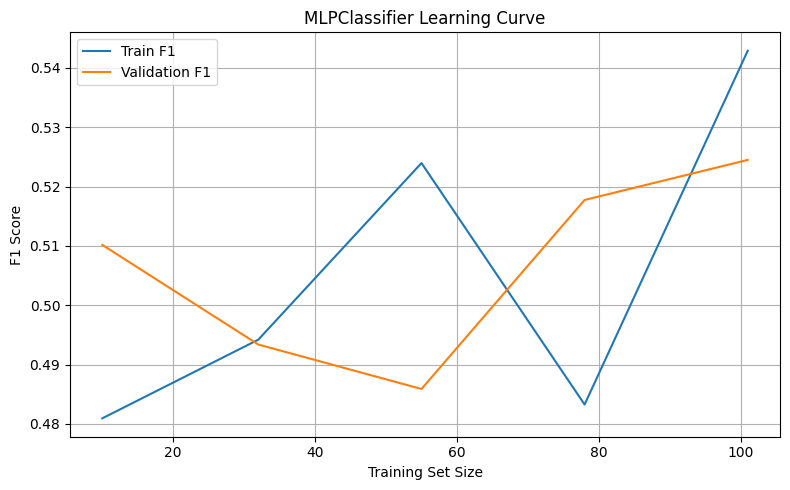


Validation Accuracy: 0.6299212598425197
Validation F1: 0.5523809523809524
Validation ROC AUC: 0.6123085649461145


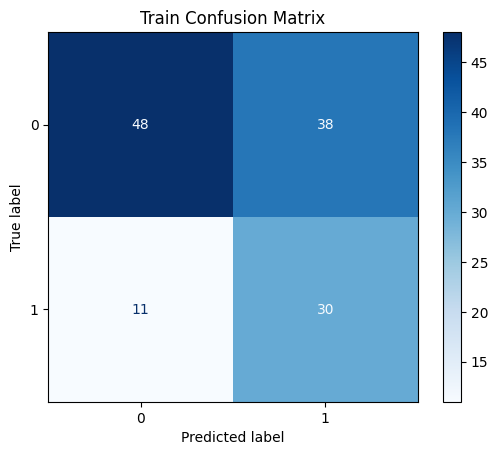

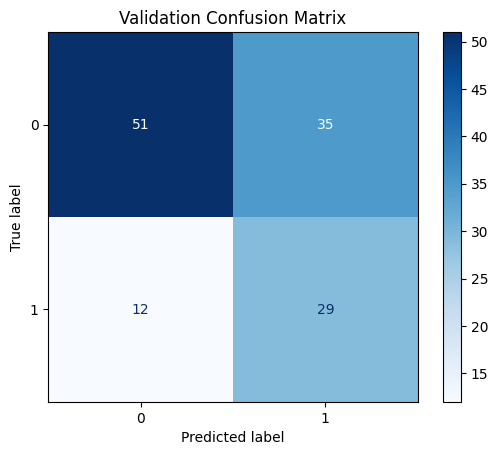

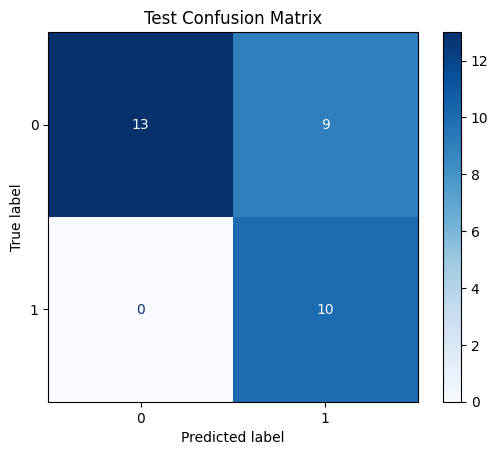

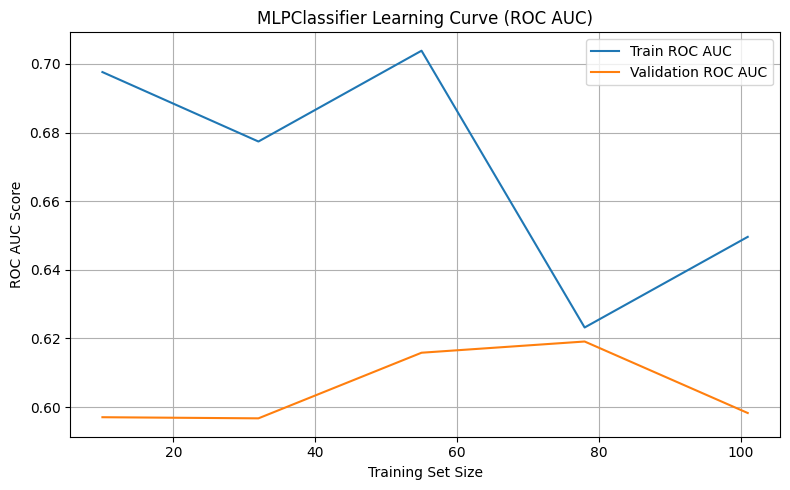

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    average_precision_score, classification_report
)
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline


pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomOverSampler(random_state=42)),
    ('clf', MLPClassifier(max_iter=300, early_stopping=True, random_state=42,activation='tanh',solver='lbfgs'))
])

param_grid = {
    'clf__hidden_layer_sizes': [(30,), (50,), (100,), (100, 50)],
    'clf__alpha': [0.001, 0.01, 0.1, 1.0],
    'clf__learning_rate_init': [0.0005, 0.001, 0.01],
    'clf__activation': ['relu', 'tanh'],
    'clf__solver': ['adam'],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

search.fit(X_train, y_train)

# Predictions
y_pred_train = search.best_estimator_.predict(X_train)
y_pred_test = search.best_estimator_.predict(X_test)
y_proba_train = search.best_estimator_.predict_proba(X_train)[:, 1]
y_proba_test = search.best_estimator_.predict_proba(X_test)[:, 1]

print(f"\nBest Params: {search.best_params_}")
print(f"Best CV F1 Score: {search.best_score_:.3f}")

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Train F1: {f1_score(y_train, y_pred_train):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Test F1: {f1_score(y_test, y_pred_test):.3f}")
print(f"Train AUC: {roc_auc_score(y_train, y_proba_train):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, y_proba_test):.3f}")
print(f"Test PR AUC: {average_precision_score(y_test, y_proba_test):.3f}")

print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test, target_names=["NonToxic", "Toxic"]))

train_sizes, train_scores, val_scores = learning_curve(
    search.best_estimator_, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Train F1")
plt.plot(train_sizes, val_scores_mean, label="Validation F1")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.title("MLPClassifier Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
y_pred_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict'
)
y_proba_val = cross_val_predict(
    search.best_estimator_, X_train, y_train, cv=cv, method='predict_proba'
)[:, 1]

print("\nValidation Accuracy:", accuracy_score(y_train, y_pred_val))
print("Validation F1:", f1_score(y_train, y_pred_val))
print("Validation ROC AUC:", roc_auc_score(y_train, y_proba_val))

cm_train = confusion_matrix(y_train, y_pred_train)
cm_val = confusion_matrix(y_train, y_pred_val)
cm_test = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm_train).plot(cmap="Blues")
plt.title("Train Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(cm_val).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.show()

ConfusionMatrixDisplay(cm_test).plot(cmap="Blues")
plt.title("Test Confusion Matrix")
plt.show()

train_sizes, train_scores, val_scores = learning_curve(
    search.best_estimator_, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Train ROC AUC")
plt.plot(train_sizes, val_scores_mean, label="Validation ROC AUC")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.title("MLPClassifier Learning Curve (ROC AUC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**TabNet**

In [33]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
from pytorch_tabnet.tab_model import TabNetClassifier

# Number of k-folds and repetitions
k = 10
repeats = 3 # Number of times to repeat the k-fold process

# Initialize stratified k-fold for balanced folds
stratified_kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
AUCS = []
f1s = []
precisions = []
recalls = []

# Repeating cross-validation
for repeat in range(repeats):
    print(f"\nRepeat {repeat + 1}/{repeats}")
    average_auc = 0
    average_f1 = 0
    average_precision = 0
    average_recall = 0
    
    for fold, (train_index, test_index) in enumerate(stratified_kf.split(X, Y)):
        print(f"\nFold {fold + 1}/{k}")
        
        # Splitting the data
        X_train, X_test = (
            np.array(X.iloc[train_index]).astype(np.float32),
            np.array(X.iloc[test_index]).astype(np.float32),
        )
        y_train, y_test = (
            np.array(Y.iloc[train_index]).astype(np.int32),
            np.array(Y.iloc[test_index]).astype(np.int32),
        )

        # Balancing the dataset with RandomUnderSampler
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=repeat)
        X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

        # TabNet model training
        tb_cls = TabNetClassifier(seed=0, verbose=0)
        tb_cls.fit(
            X_train_balanced,
            y_train_balanced,
            eval_set=[(X_test, y_test)],
            eval_metric=["accuracy"],
            max_epochs=500,
            patience=500,
            batch_size=32,
            drop_last=False,
        )
        feature_importances = tb_cls.feature_importances_

        # Print training and validation metrics from history
        print("Full Training and Validation History:")
        for metric_name, values in tb_cls.history.history.items():
          print(f"{metric_name}: {values}")


        # Predictions
        y_pred = tb_cls.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)
        print("AUC:", auc_score)
        average_auc += auc_score

        # Metrics Calculation
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        print("F1 Score:", f1)
        print("Precision:", precision)
        print("Recall:", recall)

        # Accumulate for averages
        average_f1 += f1
        average_precision += precision
        average_recall += recall

    # Log results for this repetition
    print("Average AUC:", average_auc / k)
    print("Average F1:", average_f1 / k)
    print("Average Precision:", average_precision / k)
    print("Average Recall:", average_recall / k)
    
    AUCS.append(average_auc / k)
    f1s.append(average_f1 / k)
    precisions.append(average_precision / k)
    recalls.append(average_recall / k)

# Final Results
print("\nOverall Results:")
print("AUCs:", AUCS)
print("Mean AUC:", np.mean(AUCS))
print("F1 Scores:", f1s)
print("Mean F1:", np.mean(f1s))
print("Precisions:", precisions)
print("Mean Precision:", np.mean(precisions))
print("Recalls:", recalls)
print("Mean Recall:", np.mean(recalls))

print("------------------------------------")



Repeat 1/3

Fold 1/10
Stop training because you reached max_epochs = 500 with best_epoch = 43 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.8495778752409894, 0.7440053380053976, 0.8041983143143032, 0.7691402513047924, 0.7050201115400895, 0.6636563384014628, 0.6959487355273702, 0.6470950919648876, 0.7022185714348502, 0.7283256002094435, 0.6773726706919463, 0.7219319913698279, 0.6814979003823322, 0.7187053146569625, 0.6700374743212825, 0.7163853515749392, 0.6875667597936548, 0.6574541615403217, 0.6531382047611735, 0.6247834278189618, 0.6249849070673403, 0.630148936872897, 0.6290567050809446, 0.6143147504847982, 0.6401923039685125, 0.6057764110357865, 0.5937979376834371, 0.6378957706948986, 0.6034871262052784, 0.6106126774912295, 0.564802664777507, 0.5647385768268419, 0.5677402278651362, 0.4836648508258488, 0.6234857051268868, 0.5660861290019491, 0.5807550108951071, 0.5087570781293123, 0.5129880931066431, 0.47697665898696234, 0.47032971744951996, 0.50004

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 10 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.8983577230702275, 0.7273007398066313, 0.8331921800323154, 0.8371304351350536, 0.8253685002741606, 0.697379047455995, 0.7643216070921525, 0.7410972118377686, 0.734595415384873, 0.6995477494986161, 0.7161723453065624, 0.7083230821982675, 0.7231641334036122, 0.7011226597039596, 0.6760997824046923, 0.7093871158102284, 0.7001727067905924, 0.6672475908113562, 0.6822543325631515, 0.6683306279389755, 0.6671164683673693, 0.691816868989364, 0.7011006604070249, 0.6990006566047668, 0.6620310752288155, 0.6451381341270779, 0.6308549746223118, 0.609913214393284, 0.6752652370411417, 0.6241292849830959, 0.616506620593693, 0.6027088165283203, 0.6068643746168717, 0.6355455906494804, 0.6179547180300173, 0.6491272527238597, 0.640979888646499, 0.6341988392498182, 0.5965261640756027, 0.5369461982146554, 0.5726757023645483, 0.6172652970189634, 0.54343106953994

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 41 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.8531118657277978, 0.7429057437440624, 0.923504580622134, 0.7376781546551249, 0.7039375227430592, 0.7317072153091431, 0.7393227141836415, 0.7136581799258357, 0.7571116841357687, 0.6857792346373849, 0.6815061983854874, 0.6781761853591256, 0.6709678043489871, 0.6877644606258558, 0.688128650188446, 0.6772738824719968, 0.6770116375840228, 0.6663590047670447, 0.7241096807562787, 0.6601765233537426, 0.6735932334609653, 0.6784190354139908, 0.6598833721616993, 0.6795303691988406, 0.6942335133967192, 0.6866821620775305, 0.6606495380401611, 0.6412322158398835, 0.6561869901159535, 0.6682255112606547, 0.6279288193453914, 0.6090169859969098, 0.6212198941603951, 0.5892487945763961, 0.6549000688221144, 0.6803971580837084, 0.577402291090592, 0.623653321162514, 0.6918038181636644, 0.6143553542054218, 0.6175791958104009, 0.7041024436121401, 0.68200815501420

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 73 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9820686604665674, 0.7582370897997981, 0.7479943296183711, 0.8150340836981068, 0.7910612406937972, 0.7432092531867649, 0.7466742474099864, 0.7128416118414506, 0.6924281068470167, 0.68561691823213, 0.7474348881970281, 0.7017658741577811, 0.6749426696611487, 0.6809591987858647, 0.6503615223843119, 0.7076749231504358, 0.6597335183102152, 0.6886492682539899, 0.6464069796645123, 0.66387547099072, 0.6581798610479935, 0.7041216414907704, 0.6747519814449808, 0.6668643225794253, 0.6252565565316573, 0.6482270826464114, 0.6208731843077618, 0.635874533134958, 0.6404808915179708, 0.6064113508100095, 0.6261581467545551, 0.5946286502091781, 0.6250233002330946, 0.6375215571859608, 0.5616246461868286, 0.5732362503590791, 0.6592197055402009, 0.5812857047371243, 0.5603721038154934, 0.515902068303979, 0.5893162851748259, 0.6243464583935945, 0.5731888543004575

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 18 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.8505540904791459, 0.693977019061213, 0.732744838880456, 0.7955472858055778, 0.7549661864405093, 0.7002139298812203, 0.693376142045726, 0.6814142232355864, 0.6867023162219835, 0.6897361615429753, 0.6799086073170537, 0.7305835304052933, 0.6773645411367002, 0.7105131848998691, 0.6936547833940258, 0.6872066363044407, 0.6712450799734696, 0.6689683639484904, 0.6789391248122506, 0.6659677650617517, 0.661103948302891, 0.6367989856263866, 0.665969553201095, 0.6525717066681903, 0.688493435797484, 0.6854152834933737, 0.6563803268515546, 0.6496363567269366, 0.6820564295934595, 0.679212300673775, 0.700212053630663, 0.6587203948394112, 0.6000097057093745, 0.6850340781004532, 0.6982385308846183, 0.5661453915678937, 0.6652090316233428, 0.7169011857198633, 0.6546524581701859, 0.6051960043285204, 0.6081410179967466, 0.6584291743195575, 0.5752947874691176, 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 82 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.8204026429549508, 0.7901894009631613, 0.7815587442854176, 0.7761589521947114, 0.7640674943509309, 0.6974931722101958, 0.7051422181336776, 0.6759824908297994, 0.6921971103419429, 0.7055294306381888, 0.6640985115714695, 0.6853015474651171, 0.699274656565293, 0.7196632286776667, 0.6386492070944413, 0.6542436402776967, 0.6488810337108114, 0.6246441835942476, 0.6280596567236859, 0.5815635556760042, 0.6050518077352772, 0.5942281614179197, 0.5766875303309896, 0.5656083951825681, 0.5841795206069946, 0.5806815287341243, 0.6227925393892371, 0.6582939158315244, 0.5618128906125608, 0.5669150365435559, 0.6474182372507842, 0.6325751750365548, 0.6014080280842988, 0.537268164365188, 0.5511978190878163, 0.6033728770587755, 0.5359559732934703, 0.5214674420978712, 0.5344618740289108, 0.5272379478682643, 0.5310818164244943, 0.5661851349084274, 0.5431375205

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 113 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.8822812982227491, 0.8120138800662496, 0.7855074716650922, 0.7444558065870533, 0.719348360662875, 0.7424011593279631, 0.7242043381151946, 0.7354550491208616, 0.6831950467565785, 0.6763372939565907, 0.6942734614662502, 0.6675045671670333, 0.6837113447811293, 0.6886914761170096, 0.6954876054888186, 0.7065188340518785, 0.6748887378236522, 0.7017418223878612, 0.6920810652815778, 0.6594694127207217, 0.658829398777174, 0.6739840066951254, 0.6514224021331124, 0.6273205513539521, 0.6657298077707705, 0.6296291325403296, 0.6531469174053358, 0.6138192907623623, 0.6139862744704537, 0.6853298233902972, 0.6186322725337484, 0.6673700679903445, 0.6646656445834948, 0.6412228812342105, 0.6391631779463395, 0.6831219092659329, 0.6528201854747274, 0.6343788996986721, 0.5731110780135446, 0.6735223920448966, 0.6295007026713827, 0.6443136800890383, 0.63038105031

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 9 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.9286427808844525, 0.8239049704178519, 0.9045311108879421, 0.8676139116287231, 0.7985686711643053, 0.8533102377601292, 0.7043215710183849, 0.6914257640423982, 0.6793213046115377, 0.6515824198722839, 0.7031423630921737, 0.6766218232071918, 0.7062196938887887, 0.7185772268668466, 0.7137681012568267, 0.6553926105084626, 0.6353842227355294, 0.6437685334164164, 0.6844644054122593, 0.6817916683528734, 0.693042851012686, 0.6618699379589247, 0.6650437738584436, 0.6780383042667223, 0.6425981780757075, 0.6303763467332592, 0.6419197709664054, 0.6603253846583159, 0.6020396299984144, 0.6727132278939952, 0.7094497784324314, 0.658789196740026, 0.6866764037505441, 0.6722492679305698, 0.6378177093422931, 0.6266272275344186, 0.6530319270880326, 0.6339901607969533, 0.6810307036275449, 0.6410864721173826, 0.5850563334382098, 0.580399637636931, 0.549094565536

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 7 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.8928391310903762, 0.7813834057913887, 0.7655569672584533, 0.8181970702277289, 0.7318115207884047, 0.7510141015052796, 0.7219791611035665, 0.7420265674591064, 0.7009701079792446, 0.6914552847544352, 0.7273624565866258, 0.6882368538114759, 0.6640683319833544, 0.6782257133060031, 0.6799486676851908, 0.6769276115629408, 0.671774242983924, 0.6359087771839566, 0.6691977739334106, 0.6655847761366103, 0.6412549601660834, 0.6093182643254598, 0.6549984971682231, 0.6298812164200677, 0.6372619469960531, 0.6094869057337443, 0.6319798840416803, 0.6284300340546503, 0.6121117042170631, 0.5932300673590766, 0.5129080110126072, 0.5097524934344821, 0.49788813061184356, 0.5171627667215135, 0.517779635058509, 0.5190445913208855, 0.5166439215342203, 0.49923866192499794, 0.4491446442074246, 0.44287290506892735, 0.5248592323727078, 0.4727812475628323, 0.5459808581

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 10 and best_val_0_accuracy = 0.8
Full Training and Validation History:
loss: [0.9695025734279467, 0.708842150543047, 0.8700662384862485, 0.7449495092682217, 0.7879824327385944, 0.7024809225745823, 0.6889056278311688, 0.7104095894357433, 0.6985826362734255, 0.6758790871371394, 0.697119811306829, 0.7385456717532614, 0.6835198661555415, 0.7252505810364432, 0.7108284131340359, 0.6896509813225787, 0.6818962097167969, 0.6938262633655382, 0.6497435414272806, 0.7237622919289962, 0.713963376439136, 0.7164356889932052, 0.6662924367448558, 0.6646166521569957, 0.6796822807063228, 0.6830070796220199, 0.7168182549269303, 0.696064803911292, 0.689357692780702, 0.6457805866780488, 0.6645215205524279, 0.6519886047943778, 0.6556787128033845, 0.6348442435264587, 0.6384337440780972, 0.6320548109386278, 0.6299965925838636, 0.5916850411373636, 0.6891077005344889, 0.5712491558945697, 0.6448322612306346, 0.7249484839646713, 0.5967003314391427

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 11 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.9607869231182596, 0.8480151632557744, 0.7325640839079152, 0.6720683885657269, 0.7995470736337744, 0.7410684901735057, 0.7724188954933829, 0.6848236166912577, 0.705257192901943, 0.7125872736391814, 0.6903423304143159, 0.6740049564320109, 0.7201047202815181, 0.6574544362399889, 0.6680072520090186, 0.6683096963426342, 0.6529743515926859, 0.6399365482123002, 0.6554366842560146, 0.6478668295818827, 0.6619487223417863, 0.627363093521284, 0.6803911898447119, 0.6466905733813411, 0.5948251045268514, 0.6214812372041785, 0.5856038642966229, 0.6442913179812224, 0.6091011529383452, 0.6029165879539822, 0.5809497133545254, 0.5703099033106929, 0.5988628035006316, 0.5275885644166366, 0.5749761514041735, 0.5901399850845337, 0.5323013896527498, 0.49548121379769366, 0.45927230171535327, 0.45702773591746454, 0.45284627701925195, 0.5367052632829418, 0.651486

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 5 and best_val_0_accuracy = 0.875
Full Training and Validation History:
loss: [1.0004205962885981, 0.7743639194447062, 0.810776570568914, 0.7173175993173019, 0.7257130171941675, 0.7389145286186881, 0.6740305734717328, 0.6778036304142164, 0.6869055162305417, 0.6912466339443041, 0.6826195198556652, 0.63757273166076, 0.7055961230526799, 0.6602028193681136, 0.6416695765827013, 0.7000741051590961, 0.6691039463748103, 0.673925625241321, 0.6767101339671923, 0.6127149981001149, 0.6243074691813925, 0.5935877121013143, 0.603686871735946, 0.6107496204583541, 0.5948825711789338, 0.5810945345007855, 0.6435607101606287, 0.5218076187631359, 0.5392863854118015, 0.5741950169853542, 0.5270438453425532, 0.5228340288867122, 0.47402154751445935, 0.49514837109524273, 0.5171573706295179, 0.49565184375514154, 0.5323698805726093, 0.40769690923068835, 0.48815992604131286, 0.5045385917891627, 0.38646668454875116, 0.4253976565340291, 0.397955455

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 63 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9583104978437009, 0.8354797285536061, 0.8438281676043635, 0.6912530945694965, 0.7025740742683411, 0.7197558024655217, 0.7112323486286661, 0.6980482624924701, 0.6836302539576655, 0.6955857095511063, 0.6958929118902787, 0.6566888223523679, 0.6608799721883691, 0.7423200581384741, 0.6765538376310597, 0.6243915894757146, 0.693933165591696, 0.7288270100303318, 0.632253779017407, 0.6835596380026444, 0.6852320432662964, 0.6465815824011097, 0.6345960886582084, 0.6554046454636947, 0.6739567751469819, 0.6421638234801914, 0.6132830018582551, 0.6551913878192073, 0.6049236758895542, 0.6953130208927653, 0.6220712428507598, 0.6340354292289071, 0.6681338393169901, 0.6420634803564652, 0.5668863394986028, 0.5711282828579778, 0.5687017518541088, 0.5968789847000785, 0.5439966631972272, 0.5324152578478274, 0.5702802176060884, 0.5286485824895941, 0.558749026578

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 19 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9258739274481068, 0.7301917127940966, 0.8750480439351953, 0.7840651506962983, 0.8537465282108473, 0.7655820742897366, 0.722604619420093, 0.7112213658249896, 0.7136822731598563, 0.7403051153473232, 0.7130785973175712, 0.7345674763555112, 0.652379546476447, 0.6822035494058029, 0.6749573842338894, 0.6984507648841195, 0.6550796265187471, 0.717029781445213, 0.6679063879925272, 0.6894902224126069, 0.6965511907701907, 0.6493988995966704, 0.6513393521308899, 0.6650605745937513, 0.6300151633179706, 0.6485728647397913, 0.6253754056018331, 0.5896488454030908, 0.6418503626533176, 0.6119438979936682, 0.6006186708160068, 0.6543898634288622, 0.5976821883865024, 0.5974874185479205, 0.587560658869536, 0.5726274407428243, 0.605452166951221, 0.5185465216636658, 0.6407510612321936, 0.6314591894979062, 0.5351640841235286, 0.6671450112176978, 0.534844351851421

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 8 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9495364116585773, 0.8500345608462458, 0.7874516274618066, 0.7823481248772662, 0.7799487269443014, 0.6727766290954922, 0.7043158256489298, 0.6915339879367662, 0.6957000234852666, 0.6698223767073258, 0.6853595712910527, 0.6504730608152307, 0.6650691369305486, 0.6747659392978834, 0.6620400910792144, 0.6474330036536508, 0.661333371763644, 0.6584492222122524, 0.67779715164848, 0.5916649154994799, 0.6699590657068335, 0.6471989232560863, 0.6358650093493254, 0.5891953007034634, 0.6185029978337495, 0.6315394277157991, 0.5683076407598413, 0.5875696021577587, 0.56909630091294, 0.5290656711744226, 0.5304794492928878, 0.48245645994725433, 0.4930821553520534, 0.5031866042510323, 0.5530690395313761, 0.5257085198941438, 0.44730316685593646, 0.5802867671717769, 0.48320509039837384, 0.42296066621075507, 0.3728486506835274, 0.44166394420292066, 0.33631968563

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 11 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.8567450124284496, 0.7498855176179305, 0.7713277573170869, 0.8306067689605381, 0.7175600476886915, 0.6884852388630742, 0.7515866445458453, 0.6989544422730155, 0.7148786627728007, 0.7249815645425216, 0.676653291868127, 0.694670627946439, 0.688754247582477, 0.7018039304277172, 0.660440989162611, 0.6739850121995677, 0.6537884007329526, 0.68989490426105, 0.6785986501237621, 0.6619285319162451, 0.6596047489539437, 0.6366743497226549, 0.6226380000943723, 0.6787809962811677, 0.6486653711484827, 0.6979639633842136, 0.6531751985135286, 0.6593245527018672, 0.6336115235867708, 0.6271599194277888, 0.6725352484246959, 0.593874454498291, 0.5512935882029326, 0.6152140161265498, 0.6364397121512372, 0.6514427532320437, 0.5467075239057126, 0.587944727876912, 0.5432151504184889, 0.6268088273380114, 0.5103131454923878, 0.5777159618294757, 0.4646347942559615

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 20 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9699333154636881, 0.7953622185665629, 0.7680423855781555, 0.6943142543668333, 0.7314686852952709, 0.7054437165674956, 0.6698584038278331, 0.6648129665333292, 0.6975713138994963, 0.6812564393748408, 0.6932685660279315, 0.6682071711706079, 0.6402764994165172, 0.644741063532622, 0.6287375507147416, 0.6351709573165231, 0.5999603478804879, 0.6344548671141915, 0.6062151323194089, 0.6442367071690767, 0.5627264717350835, 0.548134956670844, 0.5513889556345732, 0.601840993632441, 0.6078001779058705, 0.5695774296055669, 0.5562139619951663, 0.5164000962091528, 0.4626794755458832, 0.5210197801175325, 0.4536691243233888, 0.5966640451680059, 0.48927647393682727, 0.5288853360259015, 0.49926990270614624, 0.5047631678373917, 0.6860186276228531, 0.4477467031582542, 0.4334011427734209, 0.4681205995704817, 0.41652119159698486, 0.4614265237165534, 0.4690924364

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 4 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.9239907549775165, 0.8326798159143199, 0.8303762829822042, 0.7818843618683193, 0.8703003344328507, 0.7116124085758043, 0.699928659459819, 0.7443557796270951, 0.6790710272996322, 0.721053307471068, 0.6693469804266224, 0.7136698883512745, 0.641345070756, 0.6761020499727001, 0.650003643139549, 0.6703872862069503, 0.673700301543526, 0.6715165998624719, 0.6697901124539583, 0.6510004919508229, 0.6745786485464677, 0.680162136969359, 0.6329175907632579, 0.6500513320383818, 0.6061210036277771, 0.6213992134384487, 0.6016064882278442, 0.6213968836742899, 0.6211726069450378, 0.6738206459128339, 0.6202785942865454, 0.6164512556532155, 0.5608702276064002, 0.579223456590072, 0.5104791340620621, 0.5483463613883309, 0.6035296605980914, 0.48226554238277936, 0.5794470076975615, 0.5408022947933363, 0.5754292698010154, 0.5400310210559679, 0.4787267796371294, 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 37 and best_val_0_accuracy = 0.9375
Full Training and Validation History:
loss: [0.950764634874132, 0.7752968854374356, 0.830551724963718, 0.7929974953333537, 0.7720041818088955, 0.7414131376478407, 0.7396628631485833, 0.7088728202713861, 0.7143485440148247, 0.6908262623680963, 0.6919069435861376, 0.7048695882161459, 0.6817346122529772, 0.6847477555274963, 0.6905143009291754, 0.6851724147796631, 0.6807044996155633, 0.6933318045404222, 0.6881770743264093, 0.6744666642612881, 0.6893919242752923, 0.6382791691356235, 0.6448507467905681, 0.6506949212816027, 0.6632780114809672, 0.6343731655014886, 0.6724617520968119, 0.5970636102888319, 0.7018578781021966, 0.6362389630741543, 0.6377830624580383, 0.6328430599636502, 0.6037099268701341, 0.5962445391549005, 0.5666960994402568, 0.6342831081814236, 0.5422928161091275, 0.5184114601877, 0.5276188704702589, 0.5159221231937409, 0.6444277697139316, 0.5858885526657105, 0.6083243489265

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 61 and best_val_0_accuracy = 0.86667
Full Training and Validation History:
loss: [0.8783100273298181, 0.7773764444434125, 0.843358109826627, 0.7408420288044474, 0.7647494362748187, 0.7356263139973516, 0.7123250080191571, 0.7641468825547592, 0.701887537603793, 0.7116848463597505, 0.6749608361202738, 0.6925619607386382, 0.6609696875447812, 0.6800473876621412, 0.6373717707136403, 0.6721624809762706, 0.6721983888874883, 0.650325287943301, 0.6101093940112902, 0.6203595348026442, 0.6435687075490537, 0.701626673988674, 0.6442854637685029, 0.7277132194975148, 0.6465769228727921, 0.6013516809629358, 0.5666277201279349, 0.5759826950404955, 0.5288701770098313, 0.5592751788056415, 0.5506680568923121, 0.5466057113979174, 0.5247071359468543, 0.5188678114310555, 0.4092381518820058, 0.4151794469874838, 0.4932469298010287, 0.387270873007567, 0.36170575152272766, 0.4767036437988281, 0.4133398843848187, 0.4696250583814538, 0.37913611272

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 8 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [0.9222061789554098, 0.7302251769148785, 0.6953070759773254, 0.7061213980550352, 0.7700529668642127, 0.7345712029415629, 0.7838275510331859, 0.75300910939341, 0.6934265364771304, 0.7095436065093331, 0.7091091249300085, 0.758213222026825, 0.7076808654743693, 0.6959572771321172, 0.6620637541231902, 0.7221477938734967, 0.7354175655738168, 0.7134542828020842, 0.7184809057608895, 0.7301544002864672, 0.709533867628678, 0.6979417464007502, 0.6974394943403162, 0.6868843928627346, 0.6976037440092667, 0.6720138580902763, 0.6791279393693676, 0.6756221237389938, 0.6635676907456439, 0.6803546677465024, 0.6465410149615743, 0.6271369586820188, 0.6529660613640494, 0.6444897858992867, 0.6345002340233844, 0.5883281904718151, 0.6467483458311661, 0.6400547856869905, 0.6478390356768733, 0.6187997253044791, 0.6406971268031908, 0.6665010607760885, 0.6096639995989

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 47 and best_val_0_accuracy = 0.6875
Full Training and Validation History:
loss: [0.9765163996945256, 0.7443982881048451, 0.7519719704337742, 0.8699929455052251, 0.7369958913844564, 0.7290830871333247, 0.7159385758897533, 0.7717426367427992, 0.691087235575137, 0.6776315829028254, 0.68244309010713, 0.7048614776652792, 0.6529514841411425, 0.6101254950398984, 0.6712896772052931, 0.6612755967223126, 0.7098480592603269, 0.6713639938313029, 0.7006239942882372, 0.6645078063011169, 0.6747998595237732, 0.6753585286762404, 0.6890774576560311, 0.6685021467830824, 0.6502459360205609, 0.6317265215127364, 0.6660062981688458, 0.6916160220685212, 0.6359435216240261, 0.6504101830980052, 0.6363928369853807, 0.6109174153079158, 0.7077405737793964, 0.6509172916412354, 0.5971443782682004, 0.5733870190122853, 0.5894720165625863, 0.6119498662326647, 0.6165753240170686, 0.5973106441290482, 0.5184130150338878, 0.6416963209276614, 0.52299448459

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 6 and best_val_0_accuracy = 0.6875
Full Training and Validation History:
loss: [0.9401114842166072, 0.8289035791936128, 0.7570487519969111, 0.8219210272249968, 0.7736671722453573, 0.7920855102331742, 0.7297949661379275, 0.739921017833378, 0.7737766063731649, 0.6922673686690952, 0.6980776994124703, 0.7129765774892725, 0.7423071705776713, 0.6803446956302809, 0.7124672609826793, 0.7024374293244403, 0.6768468100091686, 0.6813449626383574, 0.7019507677658744, 0.6864746005638785, 0.7044375098269918, 0.703274042710014, 0.6748644139455713, 0.6614046537357828, 0.646991296954777, 0.655646756939266, 0.6314490696658259, 0.6509264707565308, 0.6424257262893345, 0.64611256900041, 0.6316588598748912, 0.6082497342773105, 0.5890897382860598, 0.5958168402962063, 0.5750618732493856, 0.6837765522625135, 0.6295543649922246, 0.6198676928229954, 0.6422352376191512, 0.6190747359524602, 0.6597334975781648, 0.6865994593371516, 0.655630653319151

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 11 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9687948874805284, 0.7634706549022509, 0.8029724022616511, 0.7837163080339846, 0.7462087584578473, 0.7316172174785448, 0.7164492762607076, 0.6842303846193396, 0.7132884574973065, 0.7193205123362334, 0.6766975314720817, 0.6779436391332875, 0.6766498684883118, 0.6473059628320776, 0.6896973692852518, 0.6542683839797974, 0.6287402251492376, 0.6470747356829436, 0.6709648889044056, 0.6321204149204752, 0.6531718554704086, 0.6139435534891875, 0.6533853722655255, 0.6988408669181492, 0.6041336526041445, 0.6612364597942518, 0.6328179266141809, 0.6153734922409058, 0.6112661335779273, 0.5627560926520306, 0.5691792472549106, 0.5331188958624135, 0.6211437375649161, 0.58244883754979, 0.5145943268485691, 0.4906901820846226, 0.5867900796558546, 0.5496612890906956, 0.5067190864811772, 0.5066161090913026, 0.48258183702178625, 0.5554746648539668, 0.53260324830

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 69 and best_val_0_accuracy = 0.6875
Full Training and Validation History:
loss: [0.9144185703733693, 0.7225713937178903, 0.7017198230909265, 0.7511532539906709, 0.783813362536223, 0.7505967020988464, 0.7223245657008627, 0.7667006150535915, 0.7267618904943052, 0.661378888980202, 0.7026950431906659, 0.6868241247923478, 0.6827377080917358, 0.6678792886112047, 0.6893151272898135, 0.674363550932511, 0.6822575408479442, 0.7132597747056381, 0.6898572989132093, 0.6536838852840922, 0.6700966876486073, 0.6888154952422433, 0.6844057103861934, 0.6638754917227704, 0.6771961994793104, 0.6916836681573287, 0.6374984539073446, 0.6583815242933191, 0.6477935651074285, 0.689847557441048, 0.6986052057017451, 0.6578764967296434, 0.596380995667499, 0.6251803429230399, 0.668872664804044, 0.6723119538763295, 0.6234974757484768, 0.712508631789166, 0.6780631879101628, 0.6542877865874249, 0.6683736417604529, 0.6520682910214299, 0.644357958565587

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 66 and best_val_0_accuracy = 0.8125
Full Training and Validation History:
loss: [1.0144718367120493, 0.6901973123135774, 0.7521030591881793, 0.7733964298082434, 0.7899801860684934, 0.7526773369830587, 0.7585528777993243, 0.77360105773677, 0.7275106673655303, 0.7078575725140779, 0.6809392027232958, 0.6797773138336514, 0.6707041289495386, 0.6965282611224962, 0.7121471581251725, 0.7364775590274645, 0.7031286410663439, 0.682616625143134, 0.6877487172251162, 0.6917641551598258, 0.6771195530891418, 0.6860261144845382, 0.6597119440203127, 0.6784829704657845, 0.6302517833917037, 0.6924059961153113, 0.666137335093125, 0.6260000389555226, 0.6224602745926898, 0.6102485319842463, 0.6041917723158131, 0.6142020329185154, 0.551324302735536, 0.6239789180133654, 0.6121668012245841, 0.5611238246378691, 0.5755457204321156, 0.5444257388944211, 0.6269868508629177, 0.6261627414952153, 0.5971766502960868, 0.5754741093386775, 0.5938885963481

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 249 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9351208883783092, 0.786455776380456, 0.7768096405526866, 0.8159594665402952, 0.7337364994961283, 0.724503333153932, 0.6736857916997827, 0.7007274109384288, 0.7073718387147655, 0.6899805198545041, 0.6570364444152169, 0.6621604950531669, 0.7044928255288497, 0.6759693726249363, 0.6374844623648602, 0.6752898433934087, 0.6765003800392151, 0.6712158711060233, 0.6788521564525106, 0.6514823410821997, 0.6787757873535156, 0.6719620953435483, 0.6581946015357971, 0.6343082396880441, 0.629851538202037, 0.6622641475304313, 0.6455661965453107, 0.617442742637966, 0.6497559780659883, 0.6652423376622407, 0.6669320930605349, 0.6524469334146251, 0.6268115017725073, 0.5874691579652869, 0.6703434145968893, 0.5978157027907993, 0.5768132209777832, 0.6222225375797438, 0.5545006783112235, 0.5446348941844442, 0.49405716553978296, 0.580281340557596, 0.4628447877324

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 10 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [0.9208847647127898, 0.8468675898469012, 0.8433317490245985, 0.8042321308799412, 0.75845693246178, 0.7165240101192308, 0.7595025534215181, 0.7475859989290652, 0.7058703510657601, 0.6859424295632736, 0.6985097890314849, 0.7328929434651914, 0.6710308479226154, 0.6711899223534957, 0.7020005842913752, 0.7029811843581821, 0.7223869121592977, 0.686396458874578, 0.7037619689236516, 0.7240563475567362, 0.6947624553804812, 0.6736313234204832, 0.6725319831267648, 0.6944346583407858, 0.6741030371707418, 0.7003960635351099, 0.7492247819900513, 0.6393705217734628, 0.6367807906606923, 0.638721367587214, 0.6472429166669431, 0.6333716978197512, 0.6446379734122235, 0.6314750391504039, 0.5740550756454468, 0.609261471292247, 0.6058405326760333, 0.6316044667492742, 0.5616408845652705, 0.5652662748875825, 0.6341872811317444, 0.5554621919341709, 0.514375278483266

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 19 and best_val_0_accuracy = 0.75
Full Training and Validation History:
loss: [1.0069008853700425, 0.8829139550526937, 0.7610918866263495, 0.7885780705346002, 0.7556316481696235, 0.7380703873104519, 0.7840111878183152, 0.7201041022936503, 0.7185554438167148, 0.7106051047643026, 0.697589103380839, 0.6664770378006829, 0.7413291321860419, 0.6848858488930596, 0.6829112781418695, 0.6831978427039253, 0.710173409514957, 0.6806317700280083, 0.6877178245120579, 0.6333720220459832, 0.6837221317821078, 0.6680832306543986, 0.6282159805297851, 0.6141369303067525, 0.6560493177837796, 0.6058310005399916, 0.6030151897006565, 0.6238279660542806, 0.602169332239363, 0.6459567904472351, 0.6249565018547906, 0.6800984899202983, 0.624906329313914, 0.6523671613799201, 0.6059132681952583, 0.6186052295896742, 0.5373794833819071, 0.6209599985016717, 0.5230399330457052, 0.5721646229426066, 0.5546886523564657, 0.59901638229688, 0.528642663690779,

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 500 with best_epoch = 4 and best_val_0_accuracy = 0.73333
Full Training and Validation History:
loss: [0.9747676175573597, 0.7850459399430648, 0.7641772265019624, 0.7341517054516337, 0.8191364044728486, 0.7484834297843601, 0.726499951404074, 0.7089176074318264, 0.7290303136991418, 0.7167697833931964, 0.7362444167551787, 0.7394818611766981, 0.6787900017655414, 0.6948587946269823, 0.693670524203259, 0.6853646014047705, 0.6816010915714762, 0.6816357218700907, 0.695137513720471, 0.6548483371734619, 0.6872677284738292, 0.6763186817583831, 0.5940495340720467, 0.6302277393963026, 0.6384273715641188, 0.6054478987403538, 0.5692636318828749, 0.5733980821526569, 0.7248734443084054, 0.6174687276715818, 0.7056690661803536, 0.580181044080983, 0.5739322667536528, 0.5384896682656329, 0.552962979544764, 0.5279432159403096, 0.6886852461358776, 0.5519217356391575, 0.56523037734239, 0.5627616281094758, 0.5756032881529435, 0.6085421546645786, 0.606094728345456

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**Train best model on whole data**

In [34]:
# Convert full data
X_all = np.array(X).astype(np.float32)
y_all = np.array(Y).astype(np.int32)

final_tabnet = TabNetClassifier(
    seed=42,
    verbose=0,
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-4,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"step_size": 20, "gamma": 0.95},
    scheduler_fn=torch.optim.lr_scheduler.StepLR
)

final_tabnet.fit(
    X_all,
    y_all,
    max_epochs=300,
    batch_size=32,
    virtual_batch_size=8,
    drop_last=False
)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np

# Assume: you've already trained the model as `trained_model`
# and fitted your scaler as `scaler`

# Create a pipeline that standardizes, then predicts
final_pipeline = Pipeline([
    ('scaler', scaler),              # Standardizes input
    ('model',final_tabnet)         # Already trained model
])

# Save the entire pipeline
joblib.dump(final_pipeline, 'final_pipeline.pkl')


['final_pipeline.pkl']